✅ LSTM model already exists. Loading saved model...
12675/12675 ━━━━━━━━━━━━━━━━━━━━ 49s 4ms/step

📊 LSTM Accuracy: 0.9506
📋 Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.98      0.95    202789
           1       0.98      0.92      0.95    202789

    accuracy                           0.95    405578
   macro avg       0.95      0.95      0.95    405578
weighted avg       0.95      0.95      0.95    405578



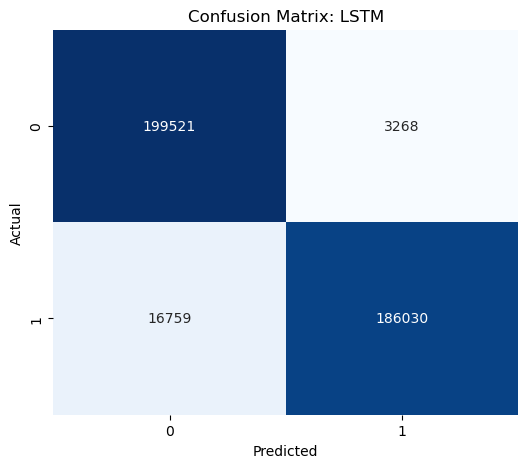

12675/12675 ━━━━━━━━━━━━━━━━━━━━ 52s 4ms/step


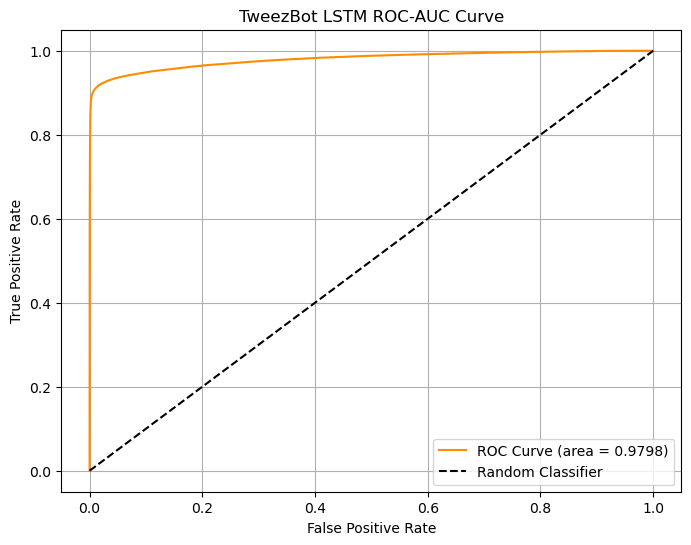

✅ All Graphs and TweezBot ROC-AUC for LSTM generated successfully!


In [15]:
# ✅ Imports
import os
import joblib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical

# ✅ Paths
base_path = os.path.expanduser("~/Desktop/Detection-of-Social-Bots-using-Machine-Learning-main/")
save_dir = os.path.join(base_path, "processed")
model_path = os.path.join(save_dir, "lstm_model.h5")

# ✅ Load features and labels
X_seq = joblib.load(os.path.join(save_dir, "X_seq_lstm.npy"))
y = joblib.load(os.path.join(save_dir, "y_labels.pkl"))

# ✅ Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X_seq, y, test_size=0.2, stratify=y, random_state=42
)

# ✅ Convert labels to categorical (for binary classification)
y_train_cat = to_categorical(y_train, num_classes=2)
y_test_cat = to_categorical(y_test, num_classes=2)

# ✅ Check if model already exists
if os.path.exists(model_path):
    print("✅ LSTM model already exists. Loading saved model...")
    model = load_model(model_path)
    history = None  # No history when loading
else:
    print("🚀 Training new LSTM model...")

    # ✅ Build model
    model = Sequential()
    model.add(Embedding(input_dim=10000, output_dim=64, input_length=50))
    model.add(LSTM(64, return_sequences=False))
    model.add(Dropout(0.3))
    model.add(Dense(2, activation="softmax"))

    model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

    # ✅ Train model
    es = EarlyStopping(monitor="val_loss", patience=2, restore_best_weights=True)

    history = model.fit(
        X_train, y_train_cat,
        validation_split=0.2,
        epochs=5,
        batch_size=1024,
        callbacks=[es],
        verbose=1
    )

    # ✅ Save model
    model.save(model_path)
    print(f"✅ LSTM model saved at: {model_path}")

# ✅ Evaluate
y_pred = np.argmax(model.predict(X_test), axis=1)
acc = accuracy_score(y_test, y_pred)

print(f"\n📊 LSTM Accuracy: {acc:.4f}")
print("📋 Classification Report:")
print(classification_report(y_test, y_pred))

# ---------------------- 🎯 Graphs Start ----------------------

# ✅ Plot: Training Accuracy & Loss (only if training happened)
if history:
    plt.figure(figsize=(14,5))

    # Accuracy curve
    plt.subplot(1,2,1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Val Accuracy')
    plt.title('Training vs Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    # Loss curve
    plt.subplot(1,2,2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.title('Training vs Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

# ✅ Plot: Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title('Confusion Matrix: LSTM')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# ✅ Extra Graph: ROC Curve (TweezBot Style)
y_prob = model.predict(X_test)[:, 1]  # Probabilities for positive class
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f"ROC Curve (area = {roc_auc:.4f})", color='darkorange')
plt.plot([0,1], [0,1], 'k--', label="Random Classifier")
plt.title('TweezBot LSTM ROC-AUC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

print("✅ All Graphs and TweezBot ROC-AUC for LSTM generated successfully!")


In [3]:
pip install xgboost

   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.3/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.3/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.5/150.0 MB 762.0 kB/s eta 0:03:17
   ---------------------------------------- 0.5/150.0 MB 762.0 kB/s eta 0:03:17
   ---------------------------------------- 0.5/150.0 MB 762.0 kB/s eta 0:03:17
   ---------------------------------------- 0.8/150.0 MB 578.7 kB/s eta 0:04:18
   ---------------------------------------- 0.8/150.0 MB 578.7 kB/s eta 0:04:18
   ---------------------------------------- 1.0/150.0 MB 585.1 kB/s eta 0:04:15
   ---------------------------------------- 1.0/150.0 MB 585.1 kB/s eta 0:04:15
   ---------------------------------------- 1.3/150.0 MB 583.5 kB/s eta 0:04:15
   ---------------------------------------- 1.3/150.0 MB 583.5 kB/s eta 0:04

[0]	validation_0-auc:0.61370
[1]	validation_0-auc:0.67739
[2]	validation_0-auc:0.68381
[3]	validation_0-auc:0.68444
[4]	validation_0-auc:0.68495
[5]	validation_0-auc:0.68564
[6]	validation_0-auc:0.68811
[7]	validation_0-auc:0.68738
[8]	validation_0-auc:0.68816
[9]	validation_0-auc:0.68884
[10]	validation_0-auc:0.68883
[11]	validation_0-auc:0.69713
[12]	validation_0-auc:0.69707
[13]	validation_0-auc:0.70029
[14]	validation_0-auc:0.70272
[15]	validation_0-auc:0.70694
[16]	validation_0-auc:0.70705
[17]	validation_0-auc:0.70706
[18]	validation_0-auc:0.70709
[19]	validation_0-auc:0.70921
[20]	validation_0-auc:0.71874
[21]	validation_0-auc:0.71890
[22]	validation_0-auc:0.72284
[23]	validation_0-auc:0.72397
[24]	validation_0-auc:0.72399
[25]	validation_0-auc:0.72401
[26]	validation_0-auc:0.72805
[27]	validation_0-auc:0.72989
[28]	validation_0-auc:0.73195
[29]	validation_0-auc:0.73200
[30]	validation_0-auc:0.73601
[31]	validation_0-auc:0.73604
[32]	validation_0-auc:0.73629
[33]	validation_0-au

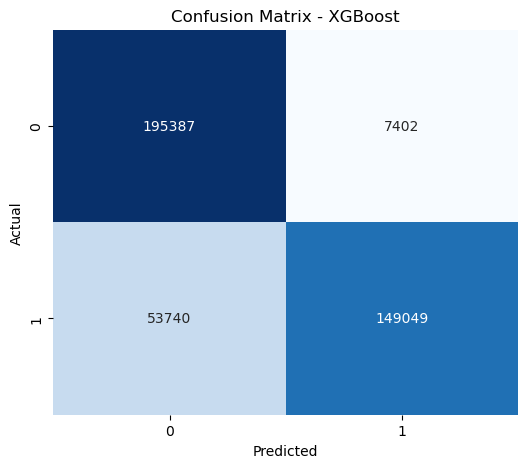

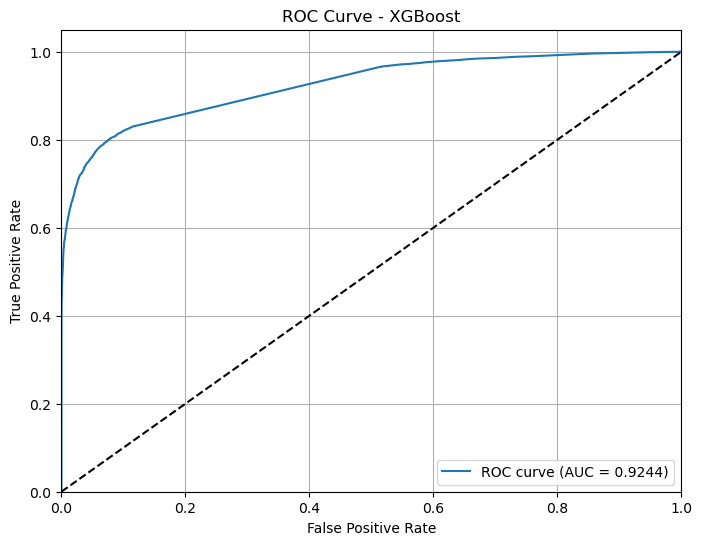

✅ All XGBoost Graphs and Metrics Done without MemoryError!


In [21]:
# ✅ Imports
import os
import joblib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_auc_score, roc_curve

# ✅ Paths
base_path = os.path.expanduser("~/Desktop/Detection-of-Social-Bots-using-Machine-Learning-main/")
save_dir = os.path.join(base_path, "processed")

# ✅ Load features and labels
X = joblib.load(os.path.join(save_dir, "X_tfidf.pkl"))  # Keep it sparse!!
y = joblib.load(os.path.join(save_dir, "y_labels.pkl"))

# ✅ Train/Test Split (on sparse matrix)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# ✅ Initialize XGBoost (no memory errors)
model = xgb.XGBClassifier(
    objective="binary:logistic",
    n_estimators=200,
    max_depth=6,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    eval_metric="auc",
    early_stopping_rounds=10,
    tree_method='hist',
    grow_policy='lossguide',
    verbosity=1
)

# ✅ Train model
model.fit(
    X_train, y_train,
    eval_set=[(X_test, y_test)],
    verbose=True
)

# ✅ Save the trained model
model_path = os.path.join(save_dir, "XGBoost_model.pkl")
joblib.dump(model, model_path)
print(f"✅ Saved XGBoost model to {model_path}")

# ✅ Evaluate
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

print("\n📊 XGBoost Performance")
print(f"🔹 Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"🔹 ROC-AUC: {roc_auc_score(y_test, y_proba):.4f}")
print("\n📋 Classification Report:")
print(classification_report(y_test, y_pred))

# ✅ Plot Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title('Confusion Matrix - XGBoost')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# ✅ Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = roc_auc_score(y_test, y_proba)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f"ROC curve (AUC = {roc_auc:.4f})")
plt.plot([0,1], [0,1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - XGBoost')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

print("✅ All XGBoost Graphs and Metrics Done without MemoryError!")


<Figure size 1200x800 with 0 Axes>

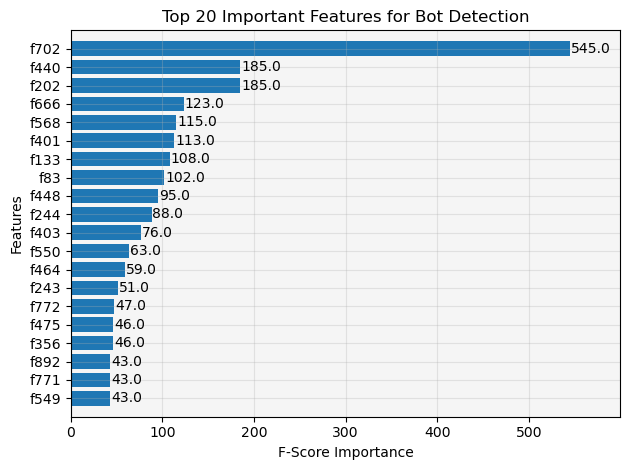

In [11]:
import matplotlib.pyplot as plt  # Add this import at the top of your script
import xgboost as xgb

# Create a larger figure for better readability
plt.figure(figsize=(12, 8))

# Plot feature importance with proper styling
xgb.plot_importance(
    model, 
    max_num_features=20,
    height=0.8,
    color='#1f77b4',  # Change bar color
    grid=True,
    title='Top 20 Important Features for Bot Detection',
    xlabel='F-Score Importance',
    importance_type='weight'  # Can use 'gain', 'weight', or 'cover'
)

# Customize the plot
plt.gca().set_facecolor('#f5f5f5')  # Light gray background
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

In [2]:
import pandas as pd
import pickle
from tensorflow.keras.preprocessing.text import Tokenizer

# 📌 Step 1: Load your cleaned_df.csv
df = pd.read_csv(r"C:\Users\leopa\Desktop\Detection-of-Social-Bots-using-Machine-Learning-main\processed\cleaned_df.csv")

# 📌 Step 2: Create a new Tokenizer
tokenizer = Tokenizer(num_words=10000, oov_token="<OOV>")
tokenizer.fit_on_texts(df["clean_tweet"].astype(str).tolist())

# 📌 Step 3: Save the tokenizer
save_path = r"C:\Users\leopa\Desktop\Detection-of-Social-Bots-using-Machine-Learning-main\models\lstm_tokenizer.pickle"
with open(save_path, 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

print(f"✅ Tokenizer saved at {save_path}")


✅ Tokenizer saved at C:\Users\leopa\Desktop\Detection-of-Social-Bots-using-Machine-Learning-main\models\lstm_tokenizer.pickle
